In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import itertools

In [3]:
import copy

In [4]:
import HTSeq
import pysam

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

------------------------------

## Config

In [6]:
import sys

In [7]:
project_dir = '/home/pmonteagudo/workspace/silencing_project'
if project_dir not in sys.path: 
    sys.path.append(project_dir)
from config_analysis import *

- Careful **coverage** script is present both in `htseq` and `pyRNAdeg` libraries

<font color='red'> renamed parastous script `pyRNAdeg/coverage` -> `pyRNAdeg/RNAdeg_coverage.py` </font>

In [8]:
htseq_scripts_dir = os.path.join(project_dir, 'htseq/scripts')
if htseq_scripts_dir not in sys.path: 
    sys.path.append(htseq_scripts_dir)
import coverage as cov

In [9]:
from gene_counts import get_tpm_gene_counts

- other **directories**

In [10]:
#data_dir = os.path.join(project_data_dir, 'seq_data')
data_dir = data_dir
data_dir

'/gcm-lfs1/pablo/data/rna_silencing/seq_data'

In [11]:
#results_dir = os.path.join(project_data_dir, 'results')
results_dir = data_results_dir
results_dir

'/gcm-lfs1/pablo/data/rna_silencing/results'

------

# Test Gene Counts

--------------------------

## Define Parameters

- Define `sample`

In [18]:
#data_batch = "S2-ChIP"
#data_batch = "INPUT"
#data_batch = "pA-RNA"
data_batch = "simulated-data"

In [19]:
data_replicate = "1"
#data_replicate = "2"

In [73]:
#sample_id = 'WT_{}_{}'.format(data_batch)
#sample_id = 'WT_S2-ChIP-{}_{}'.format(data_batch, data_replicate)
sample_id = 'chip-fake-reads_{}_{}'.format(data_batch, data_replicate)
#sample_id = 'rna-fake-reads_{}_{}'.format(data_batch, data_replicate)
sample_id

'chip-fake-reads_simulated-data_1'

In [74]:
if "ChIP" in data_batch:
    #subtract_input = ""
    subtract_input = "subtracted_INPUT_"
else:
    subtract_input = ""
subtract_input

''

- **Output directory** for `sample` gene count results

In [75]:
out_dir = os.path.join(results_dir, data_batch, "xp_data", sample_id)
out_dir

'/gcm-lfs1/pablo/data/rna_silencing/results/simulated-data/xp_data/chip-fake-reads_simulated-data_1'

- Select **gdf file**: Gene Information Table

In [76]:
in_gdf = os.path.join(project_data_dir, 'annotation/gff_v2/Schizosaccharomyces_pombe_all_chromosomes.extended.features.csv')

In [77]:
gdf_cols = ["seqid", "type", "start", "end", "strand", "gene_id", "gene_name", "transcript_id",
            "intron_length", "transcript_length",  "bio_type", "gene_length", "category"]

In [78]:
## Import Gene Data Table (gdf)
gdf = pd.read_csv(in_gdf, sep='\t', usecols=gdf_cols)
gdf.head()

,seqid,type,start,end,strand,gene_id,gene_name,transcript_id,intron_length,bio_type,gene_length,transcript_length,category
0,I,gene,1798347,1799015,+,SPAC1002.01,mrx11,SPAC1002.01.1,129.0,mRNA,669,540.0,gene
1,I,gene,1799061,1800053,+,SPAC1002.02,pom34,SPAC1002.02.1,NaN,mRNA,993,993.0,gene
2,I,gene,1799915,1803141,-,SPAC1002.03c,gls2,SPAC1002.03c.1,NaN,mRNA,3227,3227.0,gene
3,I,gene,1803624,1804491,-,SPAC1002.04c,taf11,SPAC1002.04c.1,NaN,mRNA,868,868.0,gene
4,I,gene,1804548,1806797,-,SPAC1002.05c,jmj2,SPAC1002.05c.1,NaN,mRNA,2250,2250.0,gene


In [79]:
gdf.shape # (7016, 13)

(7018, 13)

--------------------------

## Raw Gene Counts

- Load **Gene Count files**: 

In [93]:
file_name = "{}_{}pombe_gene_count_matrix.csv".format(sample_id, subtract_input)
#ile_name = "{}_{}pombe_tpm_matrix.csv".format(sample_id, subtract_input)
file_name

'chip-fake-reads_simulated-data_1_pombe_tpm_matrix.csv'

In [98]:
count_mode=""
#count_mode="_int"
#count_mode="_frac"

In [99]:
gene_counts_file = os.path.join(results_dir, data_batch, "xp_data" + count_mode, sample_id, file_name)
print(gene_counts_file)

/gcm-lfs1/pablo/data/rna_silencing/results/simulated-data/xp_data_frac/chip-fake-reads_simulated-data_1/chip-fake-reads_simulated-data_1_pombe_tpm_matrix.csv


In [100]:
gene_counts_df = pd.read_csv(gene_counts_file, sep ='\t', index_col = False)
gene_counts_df.head()

,gene_id,count,gene_name,transcript_length,gene_length,type,category,norm_length
0,SPBC460.01c,141.604118,NaN,1719.0,1719,gene,gene,1.670
1,SPBC460.02c,149.292221,NaN,663.0,948,gene,gene,0.899
2,SPBC460.03,149.292221,vba2,1704.0,1704,gene,gene,1.655
3,SPBC460.04c,149.292221,NaN,1176.0,1176,gene,gene,1.127
4,SPBC460.05,149.292221,NaN,1593.0,1593,gene,gene,1.544


In [105]:
#gene_counts_df[gene_counts_df['gene_id'].str.contains('dg|dh')]

In [54]:
gene_counts_df.shape

(7018, 7)

In [26]:
gene_counts_df.sort_values('gene_id').reset_index(drop=True)

,gene_id,count,gene_name,transcript_length,gene_length,type,category
0,FP565355_region_1..2120,4141.500000,NaN,2120.0,2120,region,repeat
1,FP565355_region_15417..15473,16.000000,NaN,57.0,57,region,repeat
2,FP565355_region_15474..15608,172.000000,NaN,135.0,135,region,repeat
3,FP565355_region_15609..16735,2156.000000,NaN,1127.0,1127,region,repeat
4,FP565355_region_16736..16794,20.000000,NaN,59.0,59,region,repeat
...,...,...,...,...,...,...,...
7011,dg1a,6906.909091,dg1_plus,3501.0,3501,gene,repeat
7012,dg1b,6906.909091,dg1_minus,3501.0,3501,gene,repeat
7013,dh1a,7904.000000,dh1_plus,4001.0,4001,gene,repeat
7014,dh1b,7904.000000,dh1_minus,4001.0,4001,gene,repeat


- **Merge** both `gene_counts_df` and `gdf`:

In [27]:
assert gene_counts_df.shape[0] == gdf.shape[0]

In [28]:
#gene_counts_df = pd.merge(gene_counts_df[['gene_id', 'count', 'alignment_count']], gdf, how='inner', on='gene_id')
gene_counts_df = pd.merge(gene_counts_df[['gene_id', 'count']], gdf, how='inner', on='gene_id')

In [29]:
gene_counts_df.head()

,gene_id,count,seqid,type,start,end,strand,gene_name,transcript_id,intron_length,bio_type,gene_length,transcript_length,category
0,SPBC460.01c,3168.0,chr_II_telomeric_gap,gene,1479,3197,-,NaN,SPBC460.01c.1,NaN,mRNA,1719,1719.0,gene
1,SPBC460.02c,1798.0,chr_II_telomeric_gap,gene,8856,9803,-,NaN,SPBC460.02c.1,285.0,mRNA,948,663.0,gene
2,SPBC460.03,3310.0,chr_II_telomeric_gap,gene,11641,13344,+,vba2,SPBC460.03.1,NaN,mRNA,1704,1704.0,gene
3,SPBC460.04c,2254.0,chr_II_telomeric_gap,gene,14073,15248,-,NaN,SPBC460.04c.1,NaN,mRNA,1176,1176.0,gene
4,SPBC460.05,3088.0,chr_II_telomeric_gap,gene,16470,18062,+,NaN,SPBC460.05.1,NaN,mRNA,1593,1593.0,gene


In [30]:
gene_counts_df.shape

(7016, 14)

- Transform `gene_counts_df` to **TPM expression** (`tpm_df`)

In [32]:
tpm_df = get_tpm_gene_counts(gene_counts_df, count_col='count', length_col='gene_length', read_length=50)
tpm_df.head()


Calculated TPM for 7016 genes.
Used `length_col`: gene_length for normalization.


,gene_id,count,seqid,type,start,end,strand,gene_name,transcript_id,intron_length,bio_type,gene_length,transcript_length,category,norm_length
0,SPBC460.01c,141.646419,chr_II_telomeric_gap,gene,1479,3197,-,NaN,SPBC460.01c.1,NaN,mRNA,1719,1719.0,gene,1.670
1,SPBC460.02c,149.336818,chr_II_telomeric_gap,gene,8856,9803,-,NaN,SPBC460.02c.1,285.0,mRNA,948,663.0,gene,0.899
2,SPBC460.03,149.336818,chr_II_telomeric_gap,gene,11641,13344,+,vba2,SPBC460.03.1,NaN,mRNA,1704,1704.0,gene,1.655
3,SPBC460.04c,149.336818,chr_II_telomeric_gap,gene,14073,15248,-,NaN,SPBC460.04c.1,NaN,mRNA,1176,1176.0,gene,1.127
4,SPBC460.05,149.336818,chr_II_telomeric_gap,gene,16470,18062,+,NaN,SPBC460.05.1,NaN,mRNA,1593,1593.0,gene,1.544


**Overwrite `gene_length` column, before it was transcript length**

In [33]:
#gene_counts_df['transcript_length'] = gene_counts_df['gene_length']
#gene_counts_df['gene_length'] =  gene_counts_df['end'] -  gene_counts_df['start'] + 1

- Load **Summary Gene Counts**: 

In [34]:
file_name = "summary_{}_{}pombe_gene_count_matrix.csv".format(sample_id, subtract_input)

In [35]:
summary_gene_counts_file = os.path.join(results_dir, data_batch, "xp_data", sample_id, file_name )
print(summary_gene_counts_file)

/gcm-lfs1/pablo/data/rna_silencing/results/simulated-data/xp_data/chip-fake-reads_simulated-data_1/summary_chip-fake-reads_simulated-data_1_pombe_gene_count_matrix.csv


In [36]:
summary_gene_counts_df = pd.read_csv(summary_gene_counts_file, sep ='\t', index_col = False)
summary_gene_counts_df.head()

,gene_id,count
0,_total_read_alignments,29311902.0
1,_read_alignments_not_unique,5113655.0
2,_no_feature_alignment,5764310.0
3,_ignore_multimapped_gene,2617827.0
4,_ambiguous_alignment,4077865.0


In [37]:
gene_counts_df.shape

(7016, 14)

## Visualization

- **Empty features**: features with no associated count

In [38]:
empty_features_df = gene_counts_df[gene_counts_df['count'].isnull()]
empty_features_df.head()

,gene_id,count,seqid,type,start,end,strand,gene_name,transcript_id,intron_length,bio_type,gene_length,transcript_length,category
6800,SPAC13D1.01c,NaN,I,gene,5191060,5195702,-,Tf2-7,SPAC13D1.01c.1,NaN,mRNA,4643,4643.0,gene
6801,SPAC19D5.09c,NaN,I,gene,5195711,5199712,-,Tf2-8,SPAC19D5.09c.1,NaN,mRNA,4002,4002.0,gene
6802,SPAC26A3.13c,NaN,I,gene,3361547,3365548,-,Tf2-4,SPAC26A3.13c.1,NaN,mRNA,4002,4002.0,gene
6803,SPAC27E2.08,NaN,I,gene,4022492,4026493,+,Tf2-6,SPAC27E2.08.1,NaN,mRNA,4002,4002.0,gene
6804,SPAC2E1P3.03c,NaN,I,gene,2927204,2931205,-,Tf2-3,SPAC2E1P3.03c.1,NaN,mRNA,4002,4002.0,gene


In [39]:
empty_features_df.shape

(216, 14)

In [40]:
gene_counts_df = gene_counts_df[~gene_counts_df['count'].isnull()]

- **Negative features**: features with associated NEGATIVE count (due to `INPUT subtraction`)

In [41]:
negative_features_df = gene_counts_df[gene_counts_df['count'] < 0]
negative_features_df = negative_features_df.sort_values('count')
negative_features_df.head()

,gene_id,count,seqid,type,start,end,strand,gene_name,transcript_id,intron_length,bio_type,gene_length,transcript_length,category


In [42]:
negative_features_df.shape

(0, 14)

In [43]:
gene_counts_df = gene_counts_df[~(gene_counts_df['count'] < 0)]

- **Gene counts** should be proportional to the `gene_length`

<Figure size 432x288 with 0 Axes>

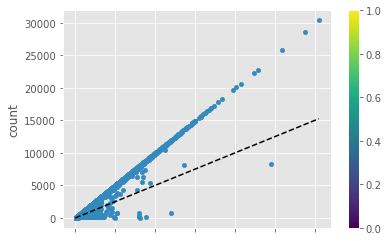

In [44]:
## ------------
## Scatter Plot
## ------------

plot_lim = max(gene_counts_df['gene_length'])
plt.figure()

gene_counts_df.plot.scatter(x = 'gene_length', y = 'count' , colormap='viridis',)
                #xlim=(0, plot_lim),
                #ylim=(0, plot_lim))

x = np.linspace(0, plot_lim, 1000)
#plt.title(' sample_id: {} (genes={})'.format(sample_id, df_by_type.sum()))
## y = x - perfect correlation
plt.plot(x, x, '--k') # dashdot black

- **Normalization**: `union`/`intersection-nonempty`

In [45]:
def union_norm(count, feature_length, read_length = 50):

    return count / (read_length + feature_length - 1)

In [46]:
gene_counts_df['union_norm'] = gene_counts_df.apply(lambda row: union_norm(row['count'], row['gene_length'], read_length = 50), axis=1)

- **Normalization**: `intersection-strict`

In [47]:
def intersection_norm(count, feature_length, read_length = 50):
    
    ## for `intersection-strict` condition not necessary
    if read_length >= feature_length:
        #assert pd.isnull(count)
        #if not pd.isnull(count):
        #    import pdb; pdb.set_trace()
            
        return np.nan
    else:
        return count / (feature_length - read_length + 1)

In [48]:
gene_counts_df['intersection_norm'] = gene_counts_df.apply(lambda row: intersection_norm(row['count'], row['gene_length'], read_length = 50), axis=1)

- **Gene counts** should be proportional to the `gene_length`

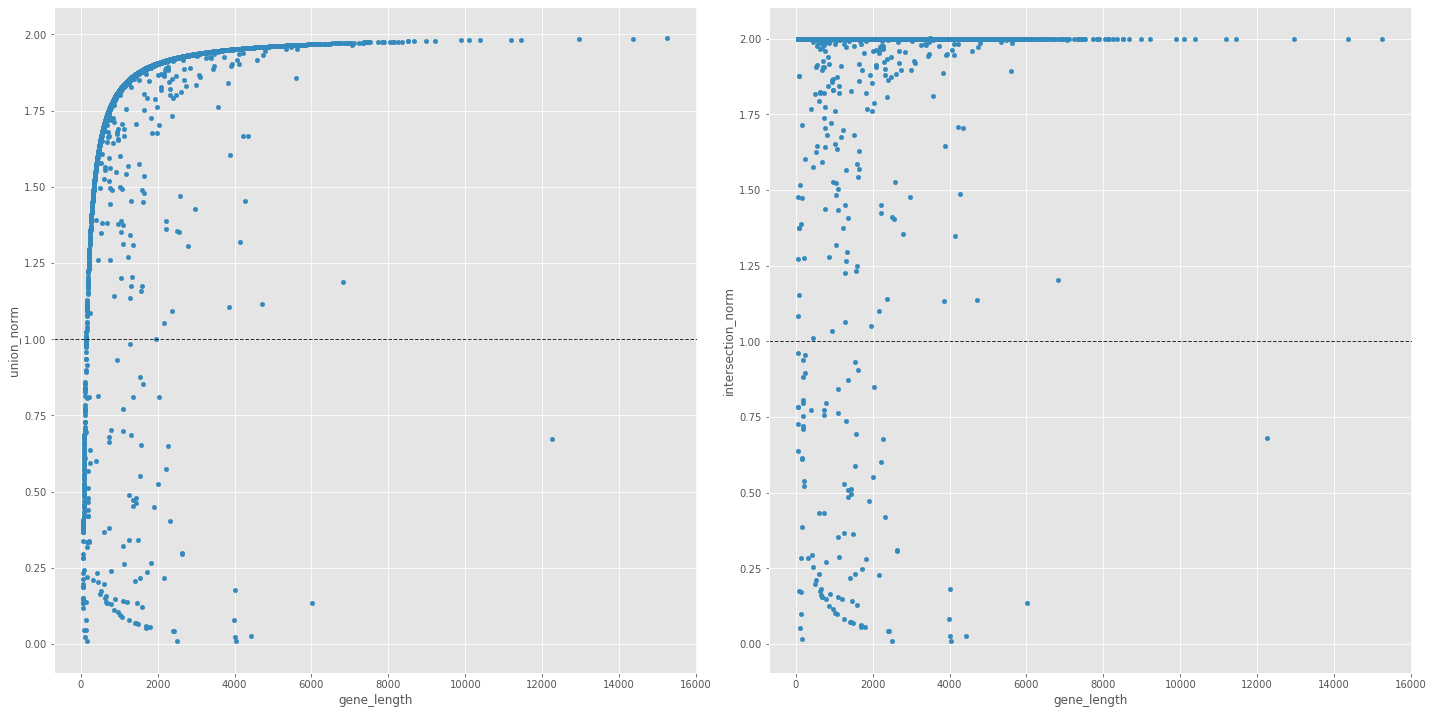

In [49]:
## ------------
## Scatter Plot
## ------------

plot_lim = max(gene_counts_df['gene_length'])
x = np.linspace(0, plot_lim, 1000)

widths = [10, 10]
heights = [10]

## https://matplotlib.org/3.1.0/tutorials/intermediate/gridspec.html
gs_kw = dict(width_ratios=widths, height_ratios=heights)
    
#fig, ax = plt.subplots(nrows = len(heights), ncols = len(widths), figsize=(sum(widths), sum(heights)), sharex='col', sharey='all', gridspec_kw=gs_kw)
fig, ax = plt.subplots(nrows = len(heights), ncols = len(widths), figsize=(sum(widths), sum(heights)), gridspec_kw=gs_kw)

gene_counts_df.plot.scatter(x = 'gene_length', y = 'union_norm', ax=ax[0])
                #xlim=(0, plot_lim),
                #ylim=(0, plot_lim))

#plt.title(' sample_id: {} (genes={})'.format(sample_id, df_by_type.sum()))
## y = x - perfect correlation
ax[0].axhline(1, linewidth=1, color='k', alpha=0.8, linestyle='--') # dashdot black


gene_counts_df.plot.scatter(x = 'gene_length', y = 'intersection_norm', ax=ax[1])
                #xlim=(0, plot_lim),
                #ylim=(0, plot_lim))

#plt.title(' sample_id: {} (genes={})'.format(sample_id, df_by_type.sum()))
## y = x - perfect correlation
ax[1].axhline(1, linewidth=1, color='k', alpha=0.8, linestyle='--') # dashdot black

fig.tight_layout(pad=1.0)

- **Deviates** from expected ground truth:

In [50]:
gene_counts_df[~np.isclose(gene_counts_df['union_norm'], 1)]

,gene_id,count,seqid,type,start,end,strand,gene_name,transcript_id,intron_length,bio_type,gene_length,transcript_length,category,union_norm,intersection_norm
0,SPBC460.01c,3168.0,chr_II_telomeric_gap,gene,1479,3197,-,NaN,SPBC460.01c.1,NaN,mRNA,1719,1719.0,gene,1.791855,1.897006
1,SPBC460.02c,1798.0,chr_II_telomeric_gap,gene,8856,9803,-,NaN,SPBC460.02c.1,285.0,mRNA,948,663.0,gene,1.803410,2.000000
2,SPBC460.03,3310.0,chr_II_telomeric_gap,gene,11641,13344,+,vba2,SPBC460.03.1,NaN,mRNA,1704,1704.0,gene,1.888192,2.000000
3,SPBC460.04c,2254.0,chr_II_telomeric_gap,gene,14073,15248,-,NaN,SPBC460.04c.1,NaN,mRNA,1176,1176.0,gene,1.840000,2.000000
4,SPBC460.05,3088.0,chr_II_telomeric_gap,gene,16470,18062,+,NaN,SPBC460.05.1,NaN,mRNA,1593,1593.0,gene,1.880633,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,SPMIT.10,352.0,mitochondrial,gene,17806,18030,+,atp9,SPMIT.10.1,NaN,mRNA,225,225.0,gene,1.284672,2.000000
6796,SPMITTRNAALA.01,48.0,mitochondrial,gene,18057,18129,+,NaN,SPMITTRNAALA.01.1,NaN,tRNA,73,73.0,gene,0.393443,2.000000
6797,SPMITNCRNA.01,450.0,mitochondrial,gene,18130,18403,+,rnpB,SPMITNCRNA.01.1,NaN,ncRNA,274,274.0,gene,1.393189,2.000000
6798,SPMITTRNAGLU.01,46.0,mitochondrial,gene,18404,18475,+,NaN,SPMITTRNAGLU.01.1,NaN,tRNA,72,72.0,gene,0.380165,2.000000


In [51]:
gene_counts_df[~np.isclose(gene_counts_df['intersection_norm'], 1)]

,gene_id,count,seqid,type,start,end,strand,gene_name,transcript_id,intron_length,bio_type,gene_length,transcript_length,category,union_norm,intersection_norm
0,SPBC460.01c,3168.0,chr_II_telomeric_gap,gene,1479,3197,-,NaN,SPBC460.01c.1,NaN,mRNA,1719,1719.0,gene,1.791855,1.897006
1,SPBC460.02c,1798.0,chr_II_telomeric_gap,gene,8856,9803,-,NaN,SPBC460.02c.1,285.0,mRNA,948,663.0,gene,1.803410,2.000000
2,SPBC460.03,3310.0,chr_II_telomeric_gap,gene,11641,13344,+,vba2,SPBC460.03.1,NaN,mRNA,1704,1704.0,gene,1.888192,2.000000
3,SPBC460.04c,2254.0,chr_II_telomeric_gap,gene,14073,15248,-,NaN,SPBC460.04c.1,NaN,mRNA,1176,1176.0,gene,1.840000,2.000000
4,SPBC460.05,3088.0,chr_II_telomeric_gap,gene,16470,18062,+,NaN,SPBC460.05.1,NaN,mRNA,1593,1593.0,gene,1.880633,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,SPMIT.10,352.0,mitochondrial,gene,17806,18030,+,atp9,SPMIT.10.1,NaN,mRNA,225,225.0,gene,1.284672,2.000000
6796,SPMITTRNAALA.01,48.0,mitochondrial,gene,18057,18129,+,NaN,SPMITTRNAALA.01.1,NaN,tRNA,73,73.0,gene,0.393443,2.000000
6797,SPMITNCRNA.01,450.0,mitochondrial,gene,18130,18403,+,rnpB,SPMITNCRNA.01.1,NaN,ncRNA,274,274.0,gene,1.393189,2.000000
6798,SPMITTRNAGLU.01,46.0,mitochondrial,gene,18404,18475,+,NaN,SPMITTRNAGLU.01.1,NaN,tRNA,72,72.0,gene,0.380165,2.000000


In [52]:
gene_counts_df[gene_counts_df['gene_id'].isin(all_htc_genes)]

,gene_id,count,seqid,type,start,end,strand,gene_name,transcript_id,intron_length,bio_type,gene_length,transcript_length,category,union_norm,intersection_norm
5,SPAC212.11,11225.500000,I,gene,1,5662,-,tlh1,SPAC212.11.1,NaN,mRNA,5662,5662.0,repeat,1.965593,1.999911
6,SPAC212.11b,11225.500000,I,gene,1,5662,+,tlh1_plus,SPAC212.11b.1,NaN,mRNA,5662,5662.0,repeat,1.965593,1.999911
7,SPAC212.10b,1114.000000,I,gene,5726,6331,+,SPAC212.10_plus,SPAC212.10b.1,NaN,pseudogenic_transcript,606,606.0,repeat,1.700763,2.000000
8,SPAC212.10,1114.000000,I,gene,5726,6331,-,NaN,SPAC212.10.1,NaN,pseudogenic_transcript,606,606.0,repeat,1.700763,2.000000
9,SPAC212.09c,3213.666667,I,gene,7619,9274,+,NaN,SPAC212.09c.1,NaN,pseudogenic_transcript,1656,1656.0,repeat,1.884848,1.999793
10,SPNCRNA.70,962.000000,I,gene,11027,11556,-,NaN,SPNCRNA.70.1,NaN,ncRNA,530,530.0,repeat,1.661485,2.000000
11,SPAC212.08c,2324.000000,I,gene,11784,12994,+,NaN,SPAC212.08c.1,NaN,mRNA,1211,1211.0,repeat,1.844444,2.000000
12,SPAC212.07c,1684.000000,I,gene,13665,14555,+,NaN,SPAC212.07c.1,NaN,pseudogenic_transcript,891,891.0,repeat,1.791489,2.000000
14,SPAC212.12,646.000000,I,gene,15855,16226,+,NaN,SPAC212.12.1,NaN,mRNA,372,372.0,repeat,1.534442,2.000000
15,SPAC212.06c,1768.000000,I,gene,18042,18974,+,NaN,SPAC212.06c.1,42.0,mRNA,933,891.0,repeat,1.800407,2.000000


----------------